# Final Project - Machine Learning 2024/25

### Supervised Learning algorithms - Predicting heart disease

In [19]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer



In [20]:
# read preprocessed data
data_10Missings = pd.read_csv("data/dataset_10_missing.csv")
data_20Missings = pd.read_csv("data/dataset_20_missing.csv")


In [46]:
# split data into train and test subsets
train, test = train_test_split(data_10Missings, test_size = 0.3, train_size=0.7, random_state= 13)

# handle NA values 10 pc
train = train.dropna()
# handle NA values 10 pc
test = test.dropna()

# separate the predictors and the criterion variable
trainDataWithoutCrit = train.drop('Heart_Disease', axis=1)  
trainCrit = train['Heart_Disease']       

testDataWithoutCrit = test.drop('Heart_Disease', axis=1)  
testCrit = test['Heart_Disease']  

# Decision Tree

In [40]:
# decision tree
model = tree.DecisionTreeClassifier(criterion="entropy")
model = model.fit(trainDataWithoutCrit, trainCrit)
model
# tree.plot_tree(model,
#                feature_names = list(trainDataWithoutCrit.columns), 
#                class_names = ["Diseased", "Healthy"], 
#                filled = True)
# plt.show()

DecisionTreeClassifier(criterion='entropy')

In [41]:
# get accuracy score
print(f"train data accuracy: {model.score(trainDataWithoutCrit, trainCrit).round(2)}")
print(f"test data accuracy: {model.score(testDataWithoutCrit, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.85


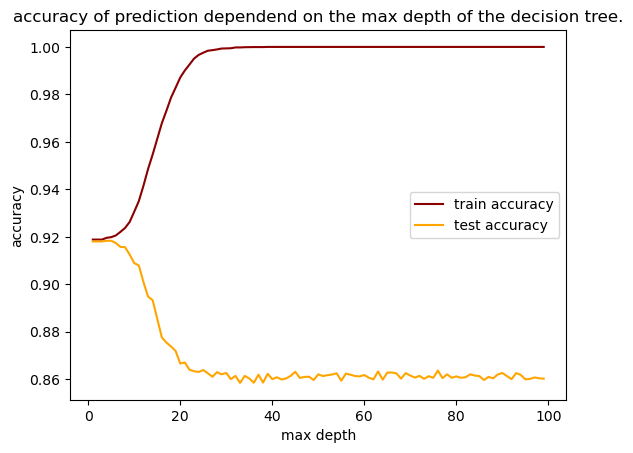

In [24]:
# decision tree with different max depths:
allTrainAccuracies = []
allTestAccuracies = []
maxDepth = 100
for i in range(1, maxDepth):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    model = model.fit(trainDataWithoutCrit, trainCrit)
    allTrainAccuracies.append(model.score(trainDataWithoutCrit, trainCrit))
    allTestAccuracies.append(model.score(testDataWithoutCrit, testCrit))

plt.plot(range(1, maxDepth), allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(range(1, maxDepth), allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the max depth of the decision tree.")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingDepth = allTestAccuracies.index(max(allTestAccuracies)) + 1

In [45]:
print(trainCrit.unique())

[0 1]


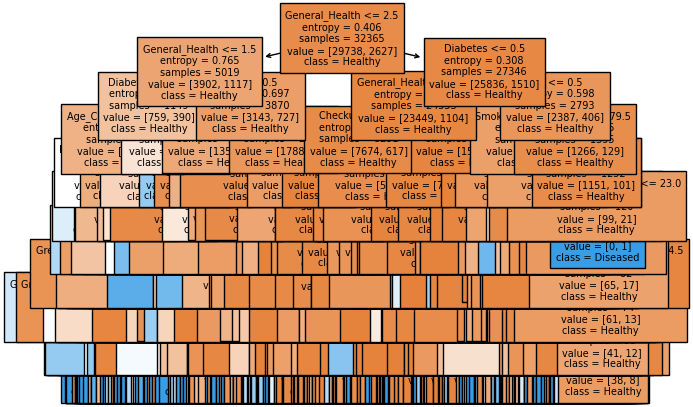

[0 1]


In [ ]:
# show best performing plot
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=bestPerformingDepth)
model = model.fit(trainDataWithoutCrit, trainCrit)
model
tree.plot_tree(model,
               feature_names = list(trainDataWithoutCrit.columns), 
               class_names = ["Healthy", "Diseased"], 
               filled = True)
plt.show()

bestAccuracyTrees10 = model.score(testDataWithoutCrit, testCrit)

### What does this mean?

Here we saw, that apparently one variable (namely "General_Health") is generally so predective that only its' classification is needed to get the overall best accuracy for a subset of 1000 cases, 5 decisions seem to have the best performance for the complete dataset.
Let's see how this behaves in other supervised algorithms.

# Multi-layer perceptron

In [26]:
# scale all features, otherwise overrepresentation for big features
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
X_train = scaler.transform(trainDataWithoutCrit)  
X_test = scaler.transform(testDataWithoutCrit)

In [27]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=1e-5,
                    hidden_layer_sizes=(10, 10), 
                    random_state=13,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


train data accuracy: 0.92
test data accuracy: 0.92


In [28]:
bestAccuracyNeuralNetworks10 = clf.score(testDataWithoutCrit, testCrit)

/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


# K-Nearest Neighbours

In [29]:
# get correct data types 
trainDataWithoutCrit = np.array(trainDataWithoutCrit)
testDataWithoutCrit = np.array(testDataWithoutCrit)
trainCrit = np.array(trainCrit)
testCrit = np.array(testCrit)

# classify
knnClassifier = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.85


### What k would make the best predictions?


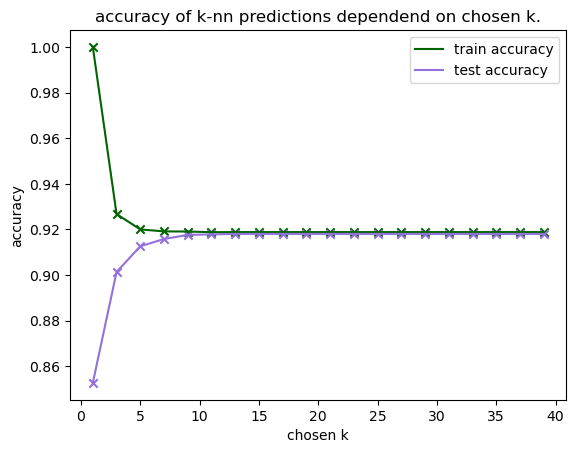

13


In [30]:
allTrainAccuracies = []
allTestAccuracies = []
listChosenK = list(range(1, 40, 2))


for i in listChosenK:
    # classify
    knnClassifier = KNeighborsClassifier(n_neighbors=i, metric = "euclidean")
    knnClassifier.fit(trainDataWithoutCrit, trainCrit)
    predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
    predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)
    # get accuracies 
    allTrainAccuracies.append(accuracy_score(predictionsKnnTrain, trainCrit))
    allTestAccuracies.append(accuracy_score(predictionsKnnTest, testCrit))

# visualise
plt.plot(listChosenK, allTrainAccuracies, c = "darkgreen", label = "train accuracy")
plt.scatter(listChosenK, allTrainAccuracies, c = "darkgreen", marker='x')
plt.plot(listChosenK, allTestAccuracies, c = "mediumpurple", label = "test accuracy")
plt.scatter(listChosenK, allTestAccuracies, c = "mediumpurple", marker='x')

plt.title("accuracy of k-nn predictions dependend on chosen k.")
plt.xlabel("chosen k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingKPosition = allTestAccuracies.index(max(allTestAccuracies)) 
bestPerformingK = listChosenK[bestPerformingKPosition]
print(bestPerformingK)

In [31]:
# classify
knnClassifier = KNeighborsClassifier(n_neighbors=bestPerformingK, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")

bestAccuracyKnn10 = knnClassifier.score(testDataWithoutCrit, testCrit)

train data accuracy: 0.92
test data accuracy: 0.92


# 20 percent missings

In [32]:
# split data into train and test subsets
train, test = train_test_split(data_20Missings, test_size = 0.3, train_size=0.7, random_state= 13)

# handle NA values 10 pc
train = train.dropna()
# handle NA values 10 pc
test = test.dropna()

# separate the predictors and the criterion variable
trainDataWithoutCrit = train.drop('Heart_Disease', axis=1)  
trainCrit = train['Heart_Disease']       

testDataWithoutCrit = test.drop('Heart_Disease', axis=1)  
testCrit = test['Heart_Disease']  

# Decision Tree


In [33]:
# decision tree
model = tree.DecisionTreeClassifier(criterion="entropy")
model = model.fit(trainDataWithoutCrit, trainCrit)
model
# tree.plot_tree(model,
#                feature_names = list(trainDataWithoutCrit.columns), 
#                class_names = ["Diseased", "Healthy"], 
#                filled = True)
# plt.show()

DecisionTreeClassifier(criterion='entropy')

In [34]:
# get accuracy score
print(f"train data accuracy: {model.score(trainDataWithoutCrit, trainCrit).round(2)}")
print(f"test data accuracy: {model.score(testDataWithoutCrit, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.85


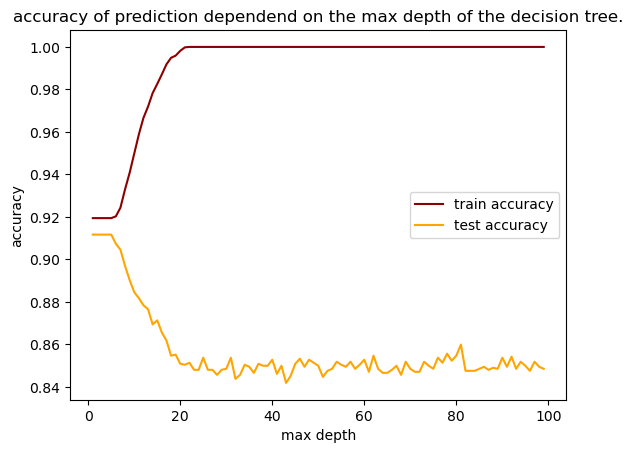

In [35]:
# decision tree with different max depths:
allTrainAccuracies = []
allTestAccuracies = []
maxDepth = 100
for i in range(1, maxDepth):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    model = model.fit(trainDataWithoutCrit, trainCrit)
    allTrainAccuracies.append(model.score(trainDataWithoutCrit, trainCrit))
    allTestAccuracies.append(model.score(testDataWithoutCrit, testCrit))

plt.plot(range(1, maxDepth), allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(range(1, maxDepth), allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the max depth of the decision tree.")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingDepth = allTestAccuracies.index(max(allTestAccuracies)) + 1

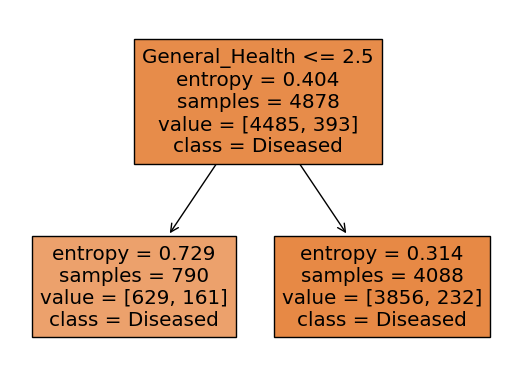

In [ ]:
# show best performing plot
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=bestPerformingDepth)
model = model.fit(trainDataWithoutCrit, trainCrit)
model
tree.plot_tree(model,
               feature_names = list(trainDataWithoutCrit.columns), 
               class_names = ["Diseased", "Healthy"], 
               filled = True)
plt.show()

bestAccuracyTrees20 = model.score(testDataWithoutCrit, testCrit)

# Neural Network

In [37]:
# scale all features, otherwise overrepresentation for big features
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
X_train = scaler.transform(trainDataWithoutCrit)  
X_test = scaler.transform(testDataWithoutCrit)

In [43]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=1e-5,
                    hidden_layer_sizes=(10, 10), 
                    random_state=13,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


train data accuracy: 0.91
test data accuracy: 0.92


In [44]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=1e-5,
                    hidden_layer_sizes=(10, 10), 
                    random_state=13,
                    max_iter=1000)
clf.fit(trainDataWithoutCrit, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(trainDataWithoutCrit, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(testDataWithoutCrit, testCrit).round(2)}")

bestAccuracyNeuralNetworks20 = clf.score(testDataWithoutCrit, testCrit)

train data accuracy: 0.91
test data accuracy: 0.92


# K-Nearest Neighbours

In [45]:
# get correct data types 
trainDataWithoutCrit = np.array(trainDataWithoutCrit)
testDataWithoutCrit = np.array(testDataWithoutCrit)
trainCrit = np.array(trainCrit)
testCrit = np.array(testCrit)

# classify
knnClassifier = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.85


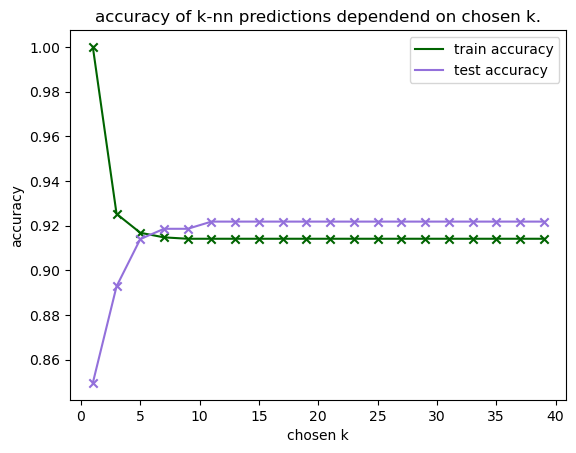

11


In [46]:
allTrainAccuracies = []
allTestAccuracies = []
listChosenK = list(range(1, 40, 2))


for i in listChosenK:
    # classify
    knnClassifier = KNeighborsClassifier(n_neighbors=i, metric = "euclidean")
    knnClassifier.fit(trainDataWithoutCrit, trainCrit)
    predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
    predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)
    # get accuracies 
    allTrainAccuracies.append(accuracy_score(predictionsKnnTrain, trainCrit))
    allTestAccuracies.append(accuracy_score(predictionsKnnTest, testCrit))

# visualise
plt.plot(listChosenK, allTrainAccuracies, c = "darkgreen", label = "train accuracy")
plt.scatter(listChosenK, allTrainAccuracies, c = "darkgreen", marker='x')
plt.plot(listChosenK, allTestAccuracies, c = "mediumpurple", label = "test accuracy")
plt.scatter(listChosenK, allTestAccuracies, c = "mediumpurple", marker='x')

plt.title("accuracy of k-nn predictions dependend on chosen k.")
plt.xlabel("chosen k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingKPosition = allTestAccuracies.index(max(allTestAccuracies)) 
bestPerformingK = listChosenK[bestPerformingKPosition]
print(bestPerformingK)

In [47]:
# classify
knnClassifier = KNeighborsClassifier(n_neighbors=bestPerformingK, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")

bestAccuracyKnn20 = knnClassifier.score(testDataWithoutCrit, testCrit)

train data accuracy: 0.91
test data accuracy: 0.92


# Overall Performances of different supervised learning algorithms

In [52]:
allAccuracies

[0.9217490548541265,
 0.921392396033954,
 0.921392396033954,
 0.9217671421997239,
 0.9217671421997239,
 0.9217671421997239]

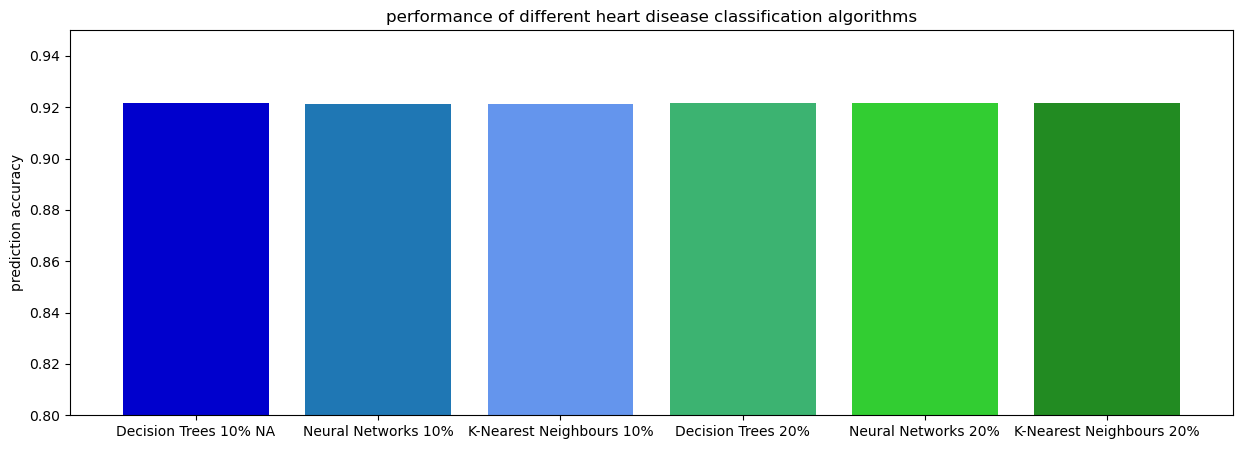

In [51]:
# visualise
classifierNames = ("Decision Trees 10% NA", "Neural Networks 10%", "K-Nearest Neighbours 10%", "Decision Trees 20%", "Neural Networks 20%", "K-Nearest Neighbours 20%")
allAccuracies = [bestAccuracyTrees10, bestAccuracyNeuralNetworks10, bestAccuracyKnn10, bestAccuracyTrees20, bestAccuracyNeuralNetworks20, bestAccuracyKnn20]
barColors = ['mediumblue', 'tab:blue','cornflowerblue', 'mediumseagreen', 'limegreen', 'forestgreen']
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([0.8, 0.95])
ax.set_ylabel("prediction accuracy")
ax.set_title("performance of different heart disease classification algorithms")
plt.show()

In [55]:
len(train)

4842

### What effect does listwise deletion have?

Here we can see, that the performacne of all our learning algorithms is more or less identical to their performance when the dataset had no NAs.

But, the dataset size is reduced horrendously. For 20% the train data set had 216197 cases in the beginning and now only 4842, meaning only 2% are still there. Another disadvantage is that there are many cases in the test dataset that had missings too, those would simply not be classified at all. 

In summary, we are not content with this technique to handle NAs and will noew try mean imputation and multiple imputation.

# Mean Imputation

In [6]:
# read preprocessed data
data_10Missings = pd.read_csv("data/dataset_10_missing.csv")
data_20Missings = pd.read_csv("data/dataset_20_missing.csv")
#data_10Missings = data_10Missings.drop("Unnamed: 0", axis = 1)
#data_20Missings = data_20Missings.drop("Unnamed: 0", axis = 1)

In [7]:
# split data into train and test subsets
train, test = train_test_split(data_10Missings, test_size = 0.3, train_size=0.7, random_state= 13)

# mean imputation
train_imputed = train.fillna(train.mean())
test_imputed = test.fillna(test.mean())


# separate the predictors and the criterion variable
trainDataWithoutCrit = train_imputed.drop('Heart_Disease', axis=1)  
trainCrit = train_imputed['Heart_Disease']       

testDataWithoutCrit = test_imputed.drop('Heart_Disease', axis=1)  
testCrit = test_imputed['Heart_Disease']  

In [10]:
trainCrit

215136    0.000000
248372    0.000000
87216     0.000000
307918    0.000000
131862    0.000000
            ...   
218868    0.000000
164706    0.000000
256742    0.000000
253456    0.080484
178352    0.000000
Name: Heart_Disease, Length: 216197, dtype: float64

### Decision Tree

In [ ]:
# decision tree
model = tree.DecisionTreeClassifier(criterion="entropy")
model = model.fit(trainDataWithoutCrit, trainCrit)
model

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# get accuracy score
print(f"train data accuracy: {model.score(trainDataWithoutCrit, trainCrit).round(2)}")
print(f"test data accuracy: {model.score(testDataWithoutCrit, testCrit).round(2)}")


In [ ]:
# decision tree with different max depths:
allTrainAccuracies = []
allTestAccuracies = []
maxDepth = 100
for i in range(1, maxDepth):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    model = model.fit(trainDataWithoutCrit, trainCrit)
    allTrainAccuracies.append(model.score(trainDataWithoutCrit, trainCrit))
    allTestAccuracies.append(model.score(testDataWithoutCrit, testCrit))

plt.plot(range(1, maxDepth), allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(range(1, maxDepth), allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the max depth of the decision tree.")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

bestPerformingDepth = allTestAccuracies.index(max(allTestAccuracies)) + 1